In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
        
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

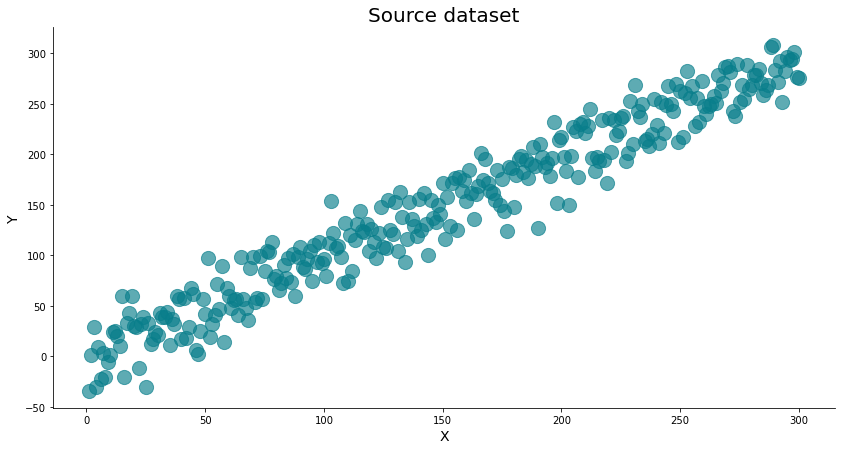

In [3]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [6]:
model.b0, model.b1

(2.6324602734241296, 0.9699829295664747)

In [7]:
preds

array([200.5089779 , 261.61790247, 151.0398485 ,  12.33228957,
       229.60846579, 222.81858529, 193.7190974 , 109.33058253,
         8.45235785, 173.34945588, 233.48839751,  58.89147019,
       215.05872185,  47.25167503, 180.13933638, 217.96867064,
       283.92750985, 208.26884134, 147.15991678, 163.64962658,
        79.26111171, 113.21051424, 245.12819267, 246.09817559,
       104.48066788,  44.34172624, 276.16764641, 289.74740743,
       155.88976314, 234.45838044,  20.09215301, 162.67964365,
        35.61187988,  26.88203351, 212.14877306, 119.03041182,
        10.39232371,  90.90090686,  48.22165796,  74.41119706,
        93.81085565,  77.32114585, 281.01756106,  61.80141898,
        78.29112878,  64.71136777, 230.57844872, 225.72853407,
       111.27054838, 227.66849993, 178.19937052, 143.27998506,
       235.42836337,  76.35116292, 291.68737328, 273.25769762,
        97.69078737,  92.84087272, 189.83916568,  27.85201644])

In [8]:
y_test

array([198.36475956, 262.93681604, 129.41793376,   1.1526128 ,
       249.23382751, 193.68732844, 231.57766544,  75.04885245,
       -22.55752004, 144.12410051, 220.0302899 ,  14.25881679,
       171.3880032 ,   6.80477596, 197.84664357, 234.00437296,
       283.1264276 , 245.05782845, 141.27589322, 200.80076392,
        76.26696324, 131.23138403, 262.60604147, 216.57283396,
       106.98873827,  28.72049009, 277.84725123, 292.90351356,
       163.55241856, 254.88144447,  43.20708097, 168.66420438,
        44.34232705, -30.61532647, 193.16792088, 125.61764995,
       -20.2252195 ,  88.07870651,   2.81334001,  57.12741727,
       104.78441908, 103.73146237, 268.05961191,  47.4908002 ,
       112.84533578,  40.7852464 , 212.90157541, 209.71277529,
        84.23421362, 242.37147034, 179.10055177, 154.80648932,
       228.75821628, 104.62951458, 300.57515173, 264.78817192,
       113.65845868,  96.09072059, 187.67071891,  32.96501117])

In [9]:
from sklearn.metrics import mean_squared_error
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

22.775238789240586

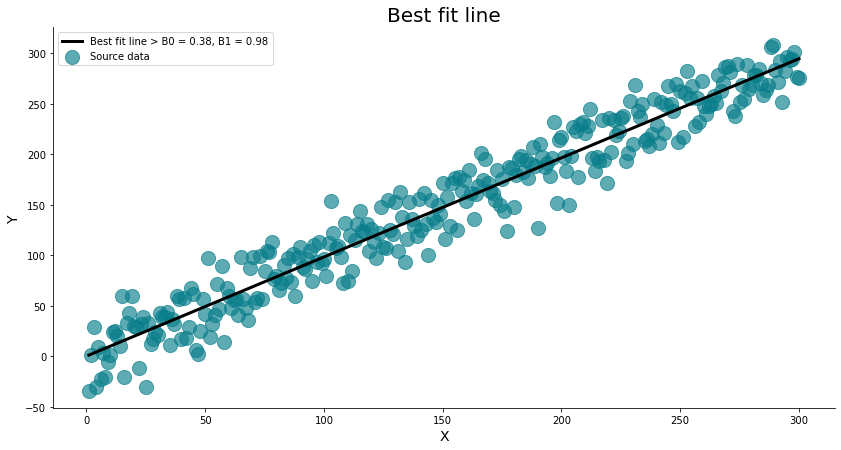

In [10]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

In [12]:
sk_model.intercept_, sk_model.coef_

(2.632460273424158, array([0.96998293]))

In [13]:
rmse(y_test, sk_preds)

22.775238789240586